In [3]:
import pandas as pd #import the library
df = pd.read_csv("diabetes.csv") #read the dataset

In [4]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
df.shape


(768, 9)

In [8]:

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
X = df.iloc[:, :-1]
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [10]:
y = df["Outcome"]

In [11]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

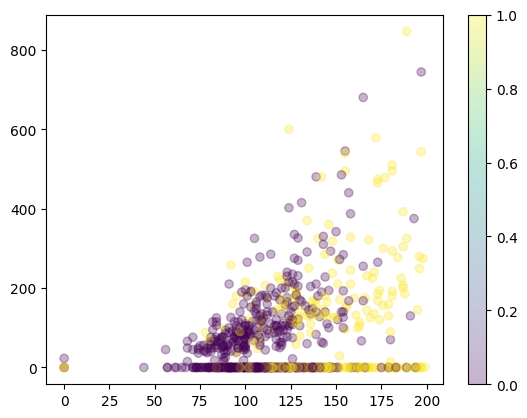

In [14]:
import matplotlib.pyplot as plt
plt.scatter(df["Glucose"],df["Insulin"], c=y, alpha=0.3, cmap='viridis')
plt.colorbar(); # show color scale

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 0)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [18]:
names = ["Logistic Regression", "Linear SVM"]
classifiers = [
 LogisticRegression(),
 SVC(kernel="linear")]

In [19]:
log_clf = LogisticRegression(max_iter = 150).fit(X_train, y_train)
log_clf.score(X_train, y_train)

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7604166666666666

In [20]:
svm_clf = SVC(random_state=0).fit(X_train, y_train)
svm_clf.score(X_train, y_train)

0.7586805555555556

In [21]:
y_eval_lr = log_clf.predict(X_test)

In [22]:
acc = sum(y_eval_lr == y_test) / float(len(y_test))
print("Accuracy: %.2f%%" % (100*acc))

Accuracy: 80.21%


In [23]:
y_eval_svm = svm_clf.predict(X_test)

In [24]:
acc = sum(y_eval_svm == y_test) / float(len(y_test))
print("Accuracy: %.2f%%" % (100*acc))

Accuracy: 77.08%
